Import Library, Select catagories, import dataset,

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space'
]

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import tensorflow as tf

from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [2]:
data_train = fetch_20newsgroups(subset='train', 
                                categories=categories, 
                                shuffle=True, random_state=42)
n_components = 5
labels = data_train.target
true_k = np.unique(labels).shape[0]

# Convert to TF-IDF format
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english', use_idf=True)
X_train = vectorizer.fit_transform(data_train.data)

# Reduce dimensions
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
# lsa = make_pipeline(svd, normalizer)

# X_train = lsa.fit_transform(X_train)

In [3]:
len(data_train.data)

2034

In [4]:
pd.DataFrame(data_train.target).value_counts()

2    593
1    584
0    480
3    377
dtype: int64

In [5]:
data_test = fetch_20newsgroups(subset='test', 
                               categories=categories, 
                               shuffle=True, random_state=42)

target_names = data_train.target_names

# Split a train set and test set
y_train, y_test = data_train.target, data_test.target

print("Extracting features from the test data using the same vectorizer")
X_test = vectorizer.transform(data_test.data)
# X_test = lsa.fit_transform(X_test)

Extracting features from the test data using the same vectorizer


In [6]:
svm_clf = SVC()
svm_clf.fit(X_train.toarray(), y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
svm_pred = svm_clf.predict(X_train.toarray())
train_score = accuracy_score(y_train, svm_pred) * 100
print(f"Train accuracy score: {train_score:.2f}%")

svm_pred = svm_clf.predict(X_test.toarray())
test_score = accuracy_score(y_test, svm_pred) * 100
print(f"Test accuracy score: {test_score:.2f}%")

Train accuracy score: 99.95%
Test accuracy score: 88.62%


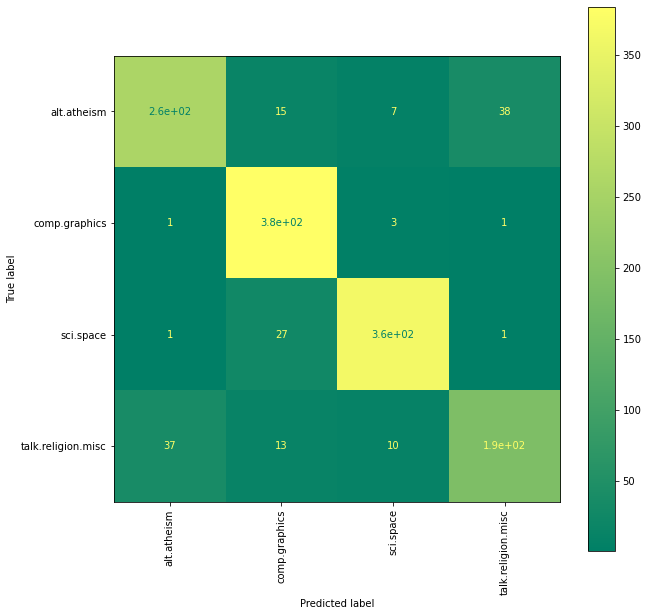

In [8]:
svm_pred = svm_clf.predict(X_test.toarray())
cm = confusion_matrix(y_test, svm_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data_train.target_names)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='summer')

plt.show()